# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Supervised Learning : Decision Trees and Visualization

A decision tree is a tree structure where an internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This tree structure helps in decision making.

It’s visualisation like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

#### Project Description

The set of these exercises will be part 1 of your project for the evaluation of this course. Make sure to add the code and analysis for each of the tasks given. Take care to write clean and commented code and to add titles, labels will displaying figures.
For this work we will be using the a Diabetes dataset from : https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv/

You do not have to download the csv as it is given with this files for this project.

1. Similar to the previous labs the first task is to import the necessary libraries like: `matplotlib`, `pandas`, `numpy`

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np

2. a. Get the description of the dataset and note down how may "features" i.e. columns are present in the dataset. We will not use all of them for the analysis. Give some thoughts about the type of data this is. [ANALYSIS]

b. Instead extract the following columns `pregnancies`, `insulin`, `bmi`, `age`, `glucose`, `bp`, and `pedigree` for the features of our model.  [CODE]

c. Identify which column would be the **label** used for the supervised learning [ANALYSIS]

In [8]:

data=pd.read_csv("pima-indians-diabetes.csv")
df=pd.DataFrame(data)
df.info()
X=df[["pregnancies","insulin","bmi","glucose","bp","diabetespedigree"]]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pregnancies       767 non-null    int64  
 1   glucose           767 non-null    int64  
 2   bp                767 non-null    int64  
 3   skin thickness    767 non-null    int64  
 4   insulin           767 non-null    int64  
 5   bmi               767 non-null    float64
 6   diabetespedigree  767 non-null    float64
 7   age               767 non-null    int64  
 8   diabetic          767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pregnancies       767 non-null    int64  
 1   insulin           767 non-null    int64  
 2   bmi               767 non-null 

ANALYSIS
Our dataset has 9 columns and these are attributes to predict the risc of diabetes. So our label would be the diabetic column.

3. **Data Split**: Split the dataset you have to get 30% for test and the rest for training

In [9]:
from sklearn.model_selection import train_test_split
y=df[["diabetic"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

4. **Training the Model**: Use the `DecisionTreeClassifier` from `sklearn.tree` to train you decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

#reducing the size of the decision tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)
#predict using the trained classifier
y_pred = clf.predict(X_test)

5. **Evaluate the Model**: Use metrics like accuracy and confusion matrix to evalute the performance of your trained model on the test set. Comment on what you can conclude from these values. Is the model good or bad?

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

#accuracy
accuracy = accuracy_score(y_test,y_pred )
print("Accuracy:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7748917748917749
Confusion Matrix:
[[140  18]
 [ 34  39]]


*ANALYSIS*:
We can see that the accuracy score is around 77% which means that our model predicts moderately well the risc for diabetes.
We can interpret the confusion matrix as follows: top-left cell (140) represents the True Negatives (TN), meaning the model correctly predicted 140 samples that belong to the negative class, the top-right cell (18) represents the False Positives (FP), indicating that the model incorrectly predicted 18 samples as positive when they actually belong to the negative class, the bottom-left cell (34) represents the False Negatives (FN), meaning the model incorrectly predicted 34 samples as negative when they actually belong to the positive class, the bottom-right cell (39) represents the True Positives (TP), indicating that the model correctly predicted 39 samples that belong to the positive class.

6. **VISUALIZATION**  Use `plot_tree` from `sklearn.tree` to get the visualization of the tree that you trained. Looking at this representation what can you say about the different columns that you chose for the model. (Which is the most distinguishing one and so on.......)


[Text(0.5, 0.875, 'glucose <= 127.5\ngini = 0.462\nsamples = 536\nvalue = [342, 194]\nclass = 0'),
 Text(0.25, 0.625, 'bmi <= 26.45\ngini = 0.323\nsamples = 331\nvalue = [264, 67]\nclass = 0'),
 Text(0.125, 0.375, 'pregnancies <= 8.5\ngini = 0.042\nsamples = 93\nvalue = [91, 2]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 87\nvalue = [86, 1]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.375, 0.375, 'glucose <= 100.5\ngini = 0.397\nsamples = 238\nvalue = [173, 65]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.201\nsamples = 97\nvalue = [86, 11]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.473\nsamples = 141\nvalue = [87, 54]\nclass = 0'),
 Text(0.75, 0.625, 'bmi <= 29.85\ngini = 0.471\nsamples = 205\nvalue = [78, 127]\nclass = 1'),
 Text(0.625, 0.375, 'glucose <= 166.5\ngini = 0.415\nsamples = 51\nvalue = [36, 15]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.337\nsamples = 42\nvalue = [33, 9]\nclass = 0'),
 Text(0.6875,

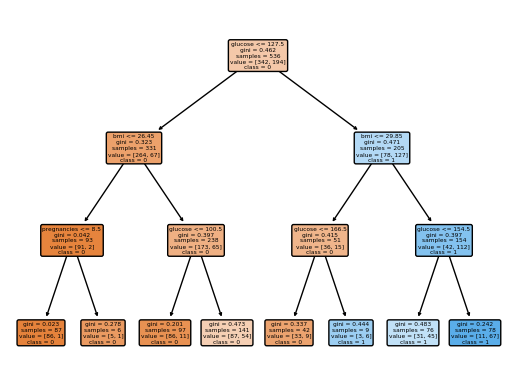

In [34]:
from sklearn.tree import plot_tree
class_names = [str(label) for label in clf.classes_]

# Plot the decision tree with class labels and feature names
plot_tree(clf, feature_names=X_train.columns, class_names=class_names, filled=True, rounded=True)



ANALYSIS: The columns that are the most influencial for our model as we can observe from the decision tree are glucose, bmi and pregnancies. However, the most distinguishing one is glucose as it appears at the root of the decision tree and is splitting the data in four instances,suggesting that it provides valuable information for distinguishing between different classes.

#### BONUS

The following part is a bonus for some extra points.

##### RANDOM FORESTS

Random forests is a supervised learning algorithm. It is the most flexible and easy to use algorithm.

A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is.
Random forests creates decision trees on randomly selected data samples, gets prediction from each
tree and selects the best solution by means of voting. It also provides a pretty good indicator of the
feature importance.


1. Using `RandomForestClassifier` from `sklearn.ensemble` train the same data as you did for the Decision tree.

2. Evaluate this model when compared to the decision tree. What can you say about the final performance of the two models?